# Direct Simulation using StateVector

Label Statevector Options:
1. '0' = |0>
2. '1' = |1>
3. '+' = sqrt(2)/2 * |0> + sqrt(2)/2 * |1>
4. '-' = sqrt(2)/2 * |0> - sqrt(2)/2 * |1>
5. 'r' = sqrt(2)/2 * |0> + sqrt(2)/2 * i * |1>
6. 'l' = sqrt(2)/2 * |0> - sqrt(2)/2 * i * |1>
And any combination of Statevectors i.e. '01-'


<IPython.core.display.Latex object>

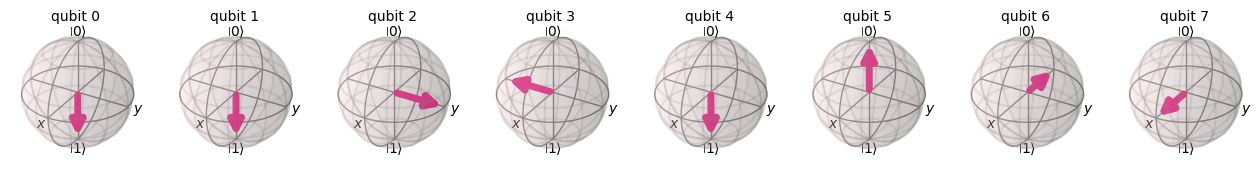

In [15]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

count = int(input("How many qubits would you like the system to be?\n"))
qubit_array = np.empty(count, dtype = object)

print("Label Statevector Options:")
print("1. '0' = |0>")
print("2. '1' = |1>")
print("3. '+' = sqrt(2)/2 * |0> + sqrt(2)/2 * |1>")
print("4. '-' = sqrt(2)/2 * |0> - sqrt(2)/2 * |1>")
print("5. 'r' = sqrt(2)/2 * |0> + sqrt(2)/2 * i * |1>")
print("6. 'l' = sqrt(2)/2 * |0> - sqrt(2)/2 * i * |1>")
print("And any combination of Statevectors i.e. '01-'")
for i in range(count):
    qubit_array[i] = input(f"Qubit {i+1}: ")

result = Statevector.from_label("".join(qubit_array[0]))

for j in range(count-1):
    result = result.tensor(Statevector.from_label("".join(qubit_array[j+1])))

display(result.draw("latex"))

plot_bloch_multivector(result)


# Quantum Circuit Representation

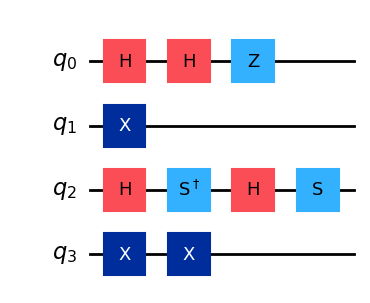

In [16]:
from qiskit import QuantumCircuit


qc = QuantumCircuit(count)

for i, qubit in enumerate (qubit_array):
    for g in range(len(qubit)):
        if qubit[g] == '0':
            pass
        elif qubit[g] == '1':
            qc.x(i)
        elif qubit[g] == '+':
            qc.h(i)
        elif qubit[g] == '-':
            qc.h(i)
            qc.z(i)
        elif qubit[g] == 'r':
            qc.h(i)
            qc.s(i)
        elif qubit[g] == 'l':
            qc.h(i)
            qc.sdg(i)

display(qc.draw("mpl"))

# Measuring States

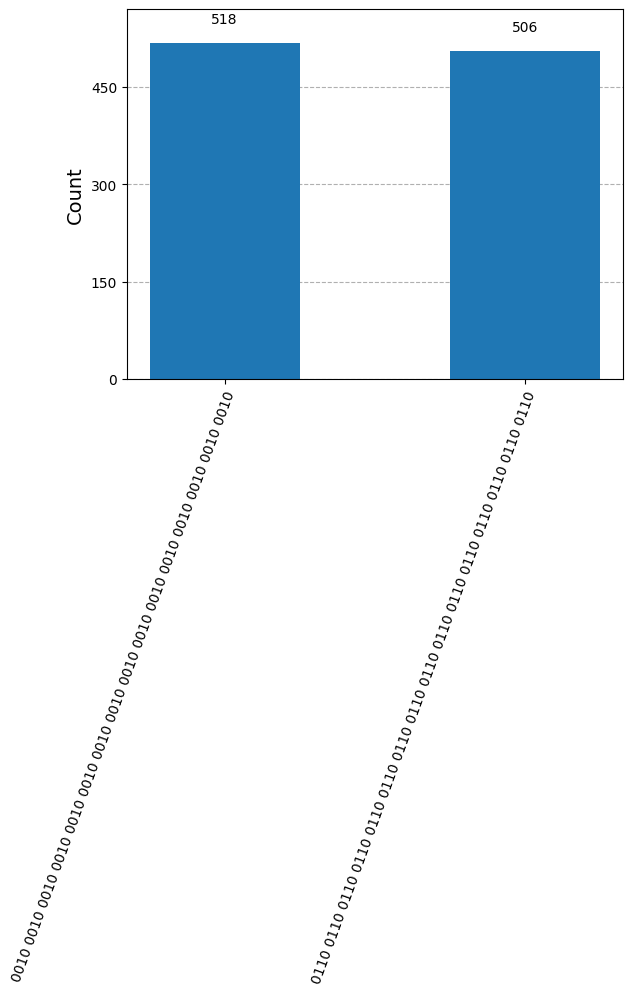

In [36]:
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
measure = int(input("How many times would you like to measure the system?"))

for k in range(measure):
    qc.measure_all()


    compiled_circuit = transpile(qc, simulator)
    sim_result = simulator.run(compiled_circuit).result()
    counts = sim_result.get_counts()
    

plot_histogram(counts)

